In [1]:
#Importing the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing libraries for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
#LOADING THE DATASET
Data= pd.read_csv(r'C:\Users\Priyal Agrawal\Desktop\Meriskill_internship\Project 2 - Diabetes Data\Project 2 MeriSKILL\diabetes.csv')
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Basic Exploration and Cleaning of Data

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
Data.isnull().sum().sum()

0

In [31]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [32]:
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
Data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [34]:
Data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
Data.shape

(768, 9)

In [36]:
Data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [38]:
len(Data[Data["Insulin"]==0])

374

In [39]:
Data=Data.drop(columns="Insulin",axis=1)
Data.shape

(768, 8)

In [40]:
# Zero values don't makes sense in some columns 
Data= Data[~(Data[Data.columns[1:-1]]==0).any(axis=1)]
Data.shape

(532, 8)

# Some Summary Information

In [42]:
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
#Check the mean values depending on their category(i.e, 0 or 1)
Data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,2.926761,110.016901,69.912676,27.290141,31.429577,0.446315,29.222535
1,4.700565,143.118644,74.700565,32.977401,35.819774,0.616588,36.412429


# Checking the missing values

<Axes: >

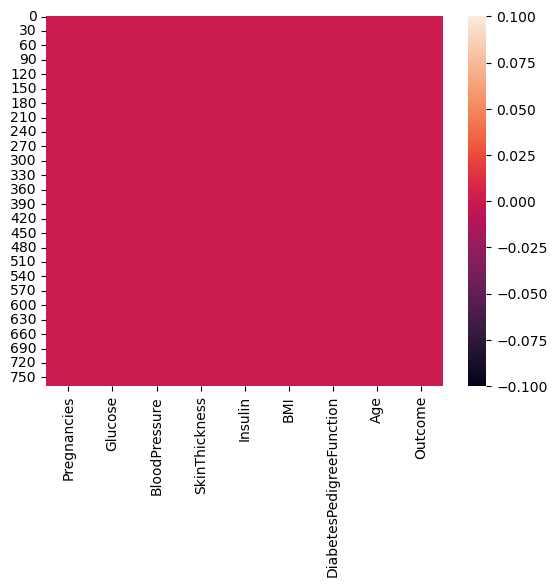

In [16]:
sns.heatmap(Data.isnull())

# Useful and Informative Plots

HISTOGRAM PLOT

C:\Users\Priyal Agrawal\AppData\Local\Temp\ipykernel_19828\3530181980.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[col],rug=True);
C:\Users\Priyal Agrawal\AppData\Local\Temp\ipykernel_19828\3530181980.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[col],rug=True);
C:\Users\P

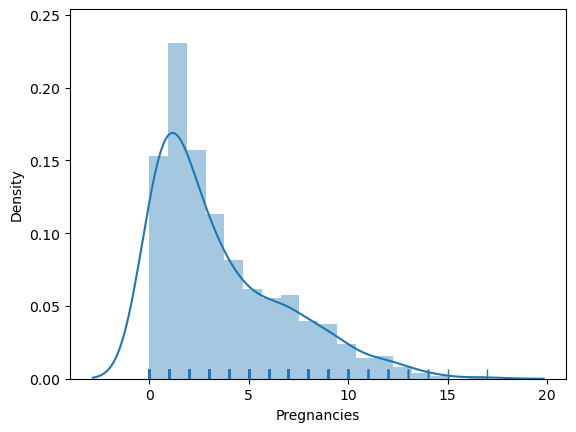

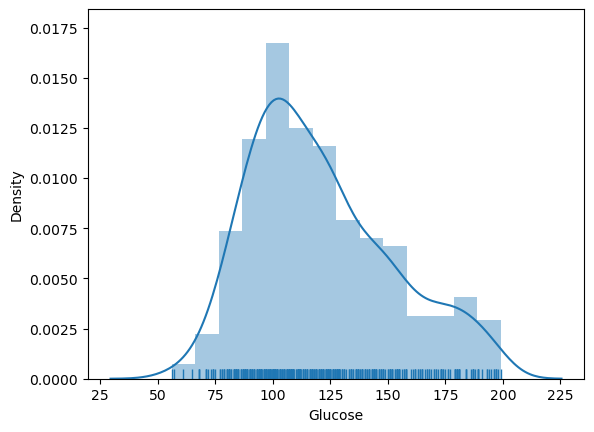

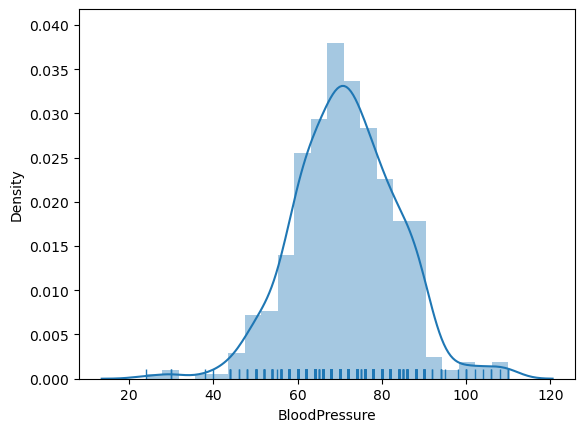

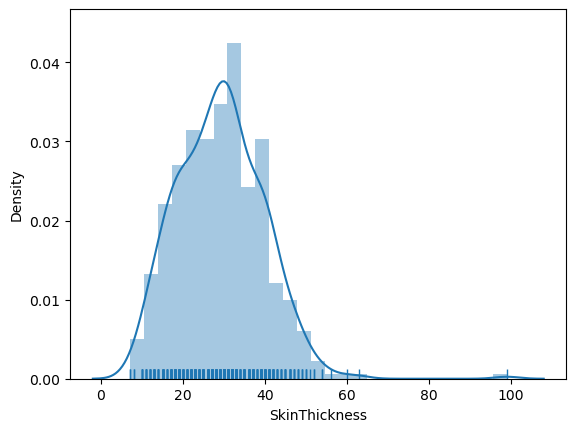

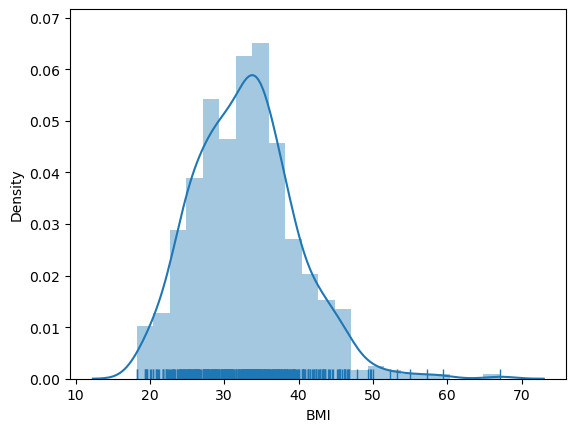

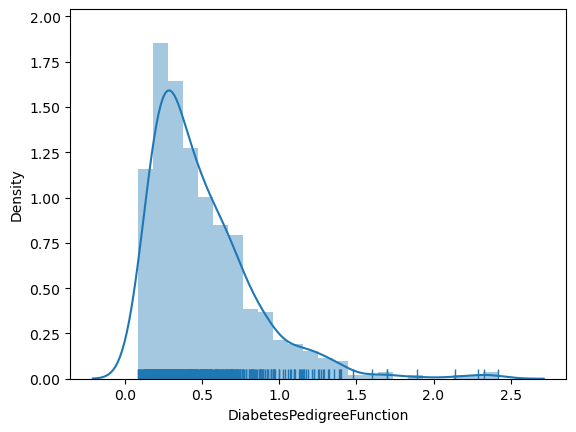

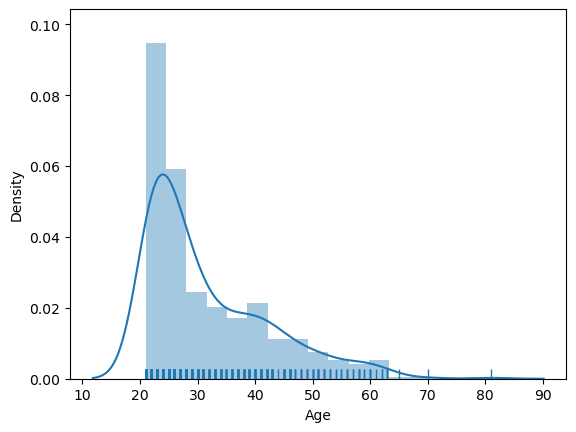

In [49]:
for i,col in enumerate(Data.columns[:-1]):
    plt.figure(i)
    sns.distplot(Data[col],rug=True);

Scatter Matrix

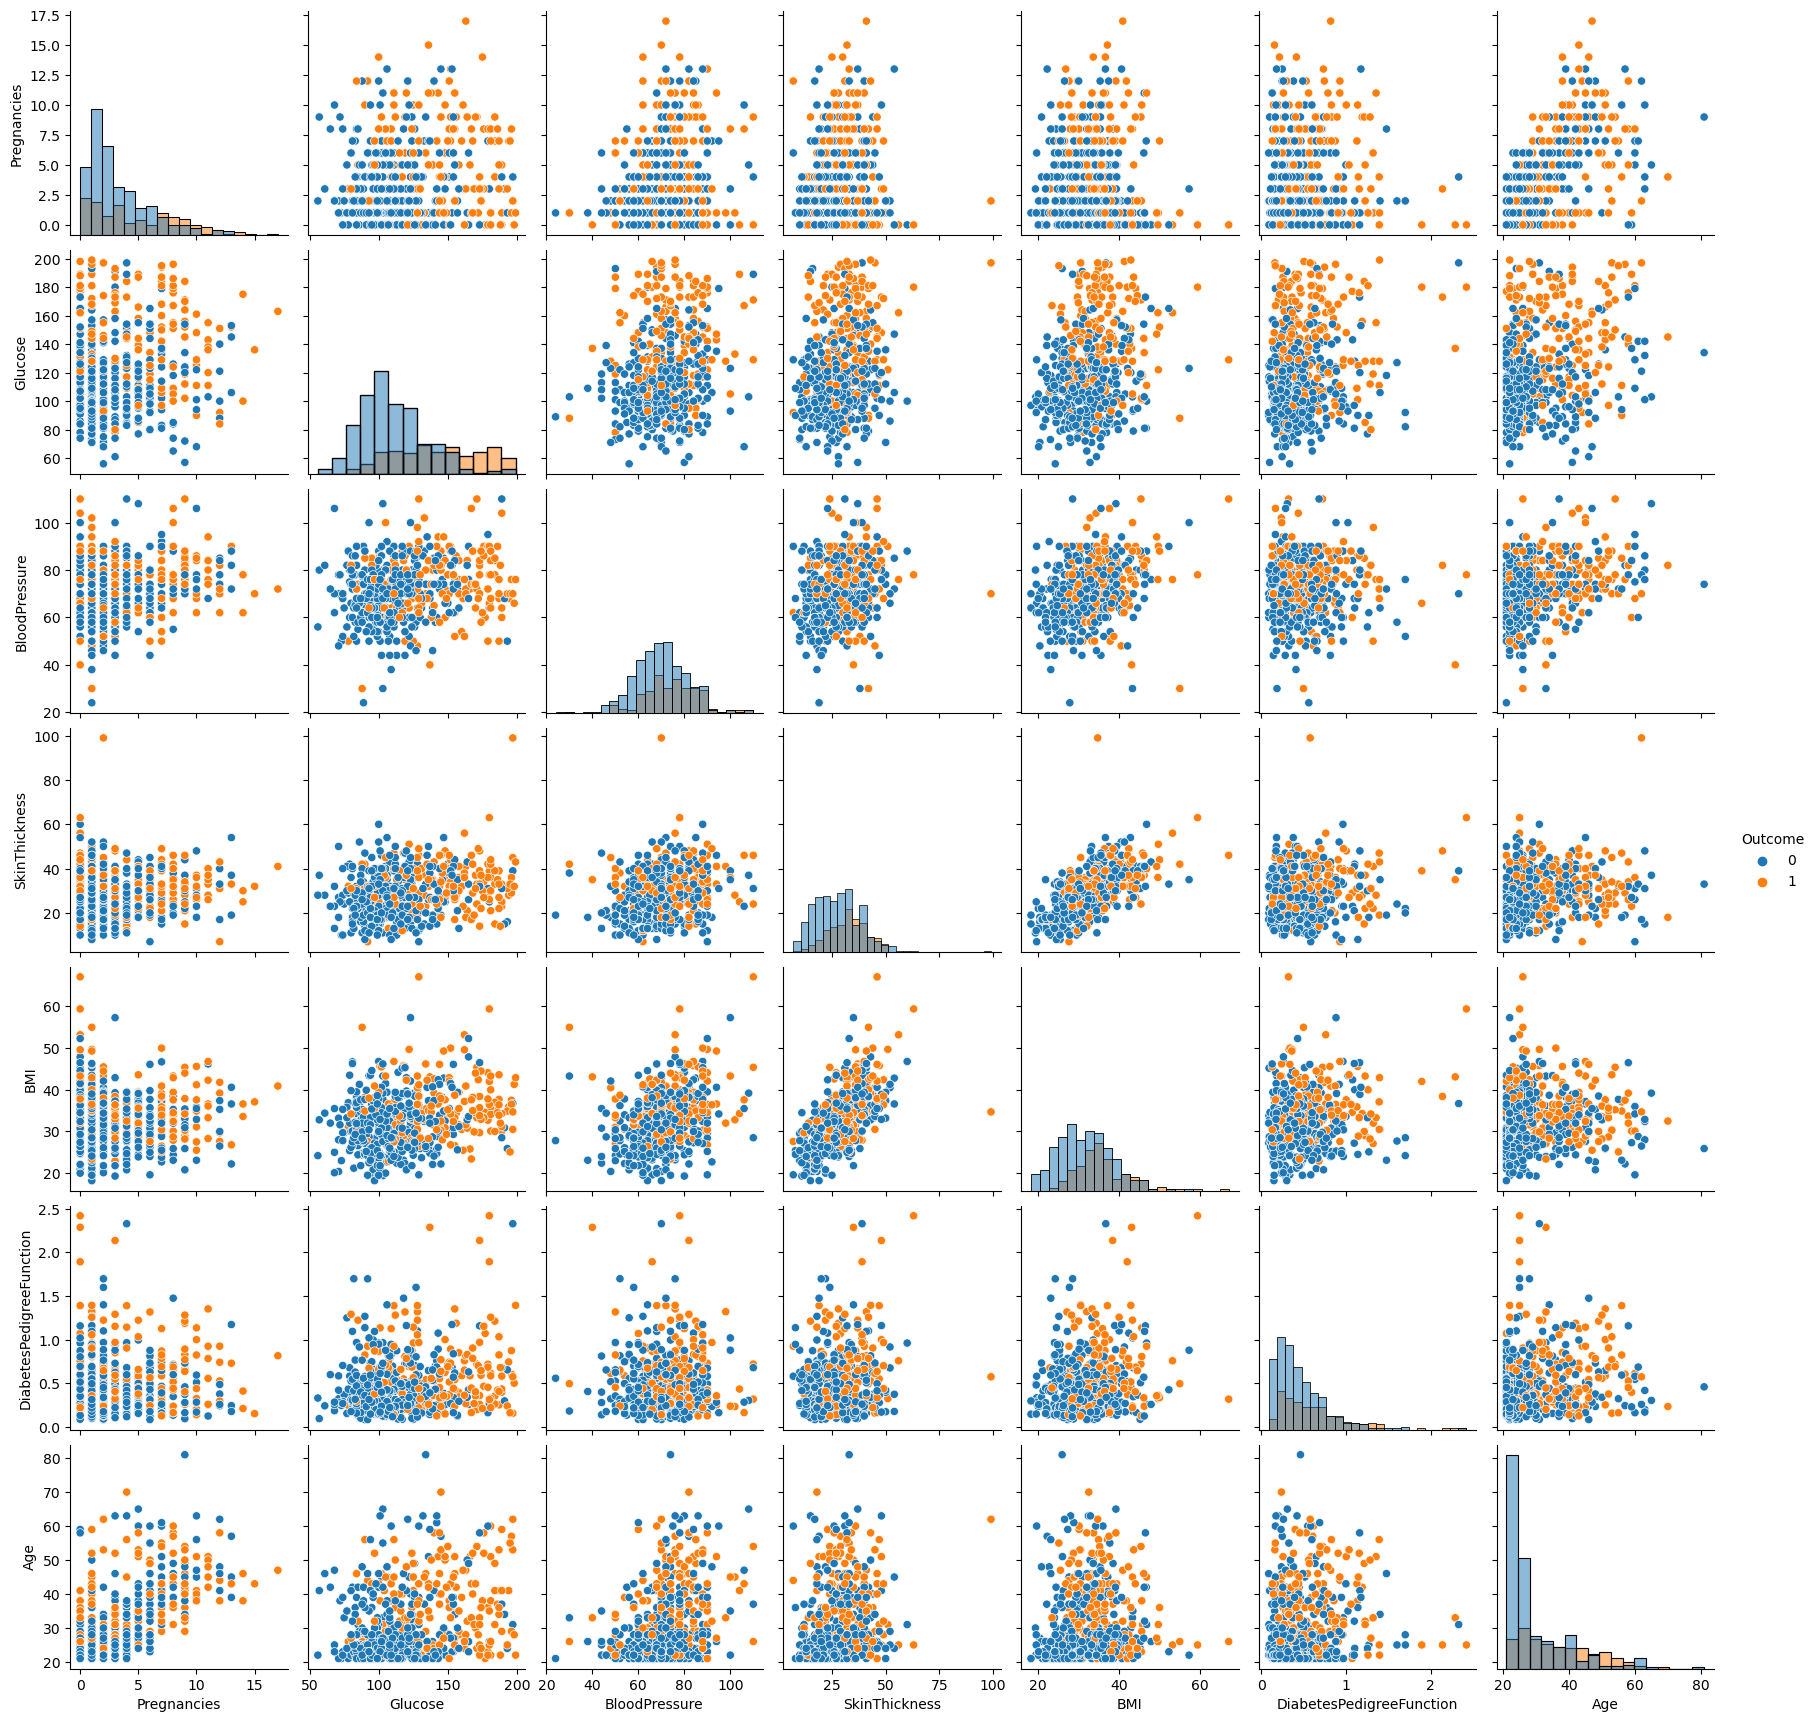

In [50]:
sns.pairplot(Data,hue='Outcome',diag_kind='hist')

# Correlation Plots

In [51]:
Data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125330,0.204663,0.095085,0.008576,0.007435,0.640747,0.252586
Glucose,0.125330,1.000000,0.219178,0.226590,0.247079,0.165817,0.278907,0.503614
BloodPressure,0.204663,0.219178,1.000000,0.226072,0.307357,0.008047,0.346939,0.183432
SkinThickness,0.095085,0.226590,0.226072,1.000000,0.647422,0.118636,0.161336,0.254874
BMI,0.008576,0.247079,0.307357,0.647422,1.000000,0.151107,0.073438,0.300901
DiabetesPedigreeFunction,0.007435,0.165817,0.008047,0.118636,0.151107,1.000000,0.071654,0.233074
Age,0.640747,0.278907,0.346939,0.161336,0.073438,0.071654,1.000000,0.315097
Outcome,0.252586,0.503614,0.183432,0.254874,0.300901,0.233074,0.315097,1.000000


<Axes: >

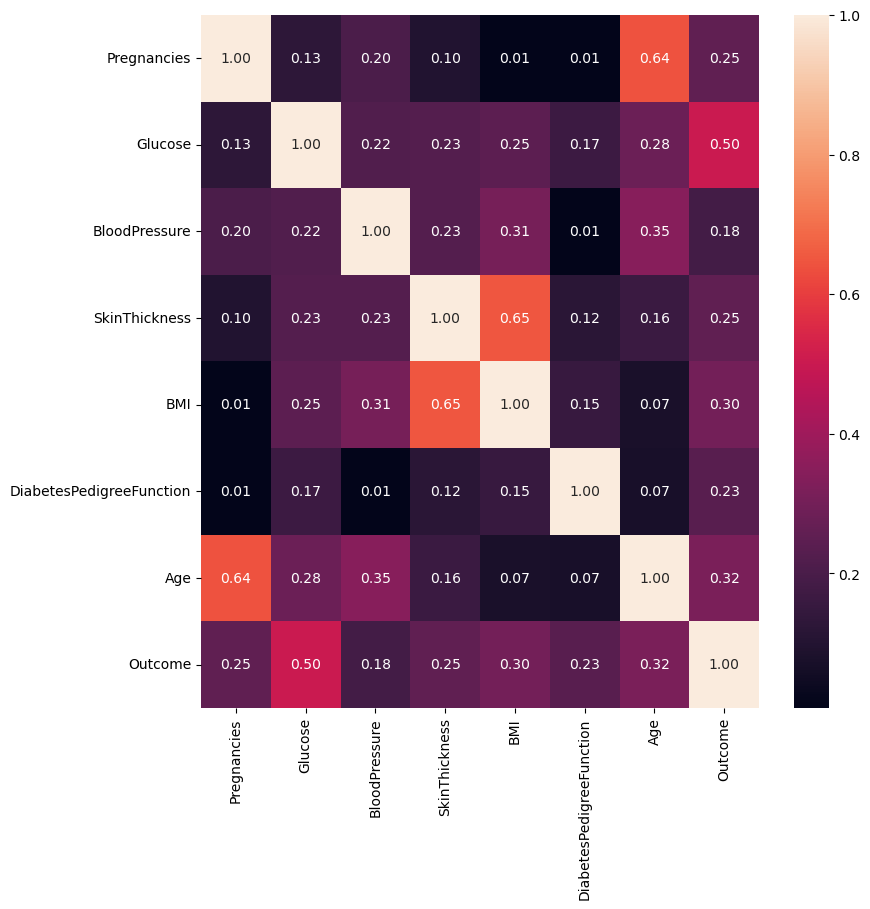

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(Data.corr()),annot=True,fmt='0.2f')

# Covariance Plot

It is a measure of how much two random variables vary together

In [56]:
Data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,10.969581,12.867664,8.344537,3.314235,0.195458,0.008485,22.837981,0.394549
Glucose,12.867664,960.952013,83.640131,73.921060,52.704249,1.771041,93.043626,7.362856
BloodPressure,8.344537,83.640131,151.542341,29.288047,26.035648,0.034132,45.961687,1.064975
SkinThickness,3.314235,73.921060,29.288047,110.752004,46.883706,0.430168,18.271898,1.265023
BMI,0.195458,52.704249,26.035648,46.883706,47.349659,0.358254,5.438223,0.976516
DiabetesPedigreeFunction,0.008485,1.771041,0.034132,0.430168,0.358254,0.118712,0.265684,0.037874
Age,22.837981,93.043626,45.961687,18.271898,5.438223,0.265684,115.811687,1.599256
Outcome,0.394549,7.362856,1.064975,1.265023,0.976516,0.037874,1.599256,0.222431


<Axes: >

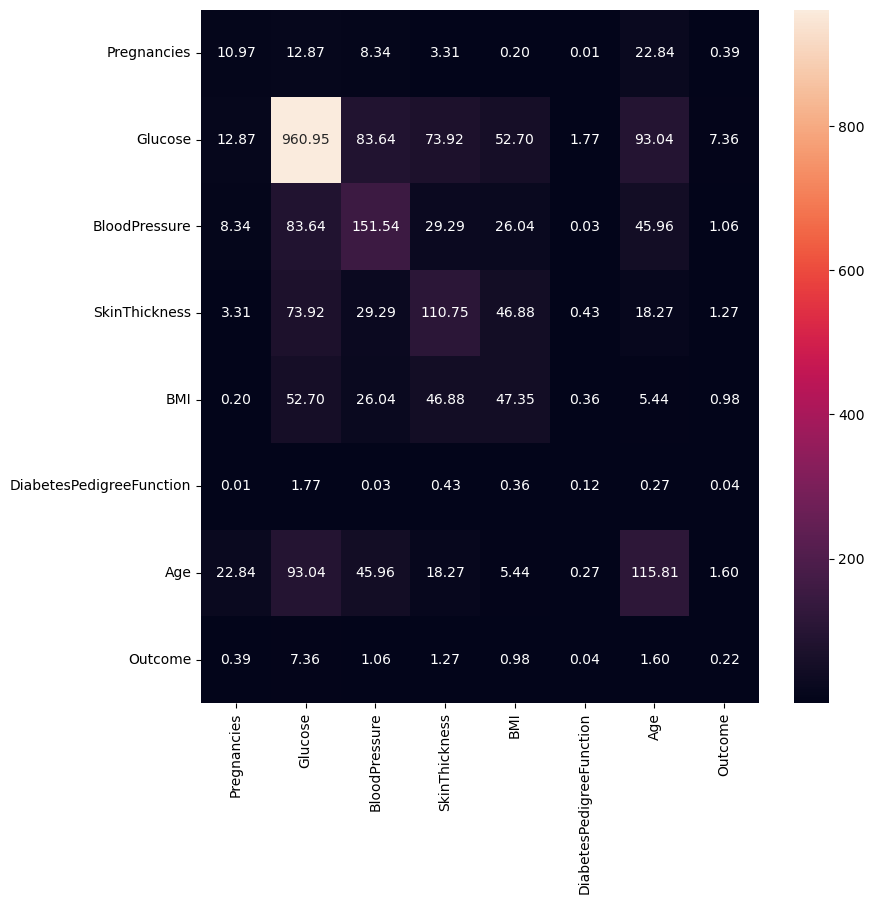

In [58]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(Data.cov()),annot=True,fmt='0.2f')

# Box Plot, Violin Plot and Bee Swarm Plots

<Axes: xlabel='Outcome', ylabel='BMI'>

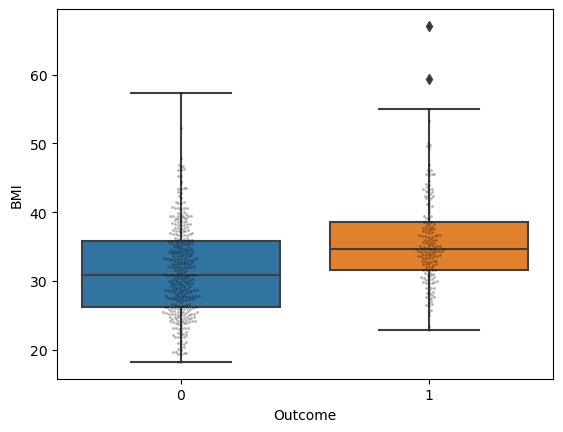

In [61]:
sns.boxplot(x='Outcome',y='BMI',data=Data,whis=3.0)
sns.swarmplot(x='Outcome',y='BMI',data=Data,size=2,color='k',alpha=0.3)

<Axes: xlabel='Outcome', ylabel='BMI'>

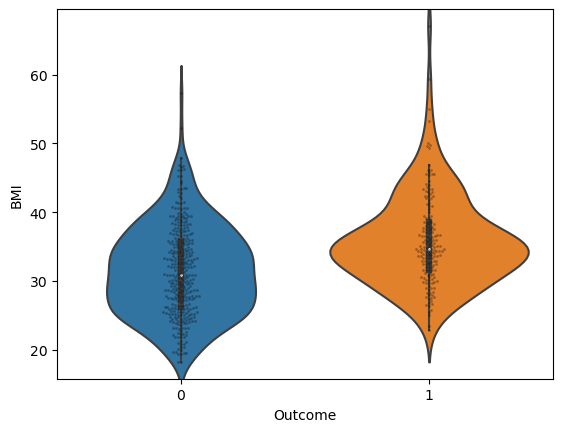

In [62]:
sns.violinplot(x='Outcome',y='BMI',data=Data)
sns.swarmplot(x='Outcome',y='BMI',data=Data,size=2,color='k',alpha=0.3)